Bike sharing - Regression Assignment

Data understanding, preparation and EDA (25%)	
--Data quality checks, if any, are performed, and all data quality issues are addressed in the right way. Explanations for data quality issues are clearly mentioned in comments.
--Categorical variables are handled appropriately.
--Dummy variables are created properly wherever applicable.
--New metrics are derived if applicable and are used for analysis and modelling.
--The data is converted to a clean format suitable for analysis.
Model building and evaluation (50%)	
--Model parameters are tuned using correct principles and the approach is explained clearly. Both the technical and business aspects are considered while building the model. 
--Correct variable selection techniques are used. A reasonable number of different models are attempted and the best one is chosen based on key performance metrics.
--Residual analysis is performed after model building and the assumptions are validated.
--Model evaluation is done using the correct principles and appropriate evaluation metrics are chosen.
--The results are on par with the best possible model on the dataset.
--The model is interpreted and explained correctly. The commented code includes a brief explanation of the important variables and the model in simple terms.



In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error



Step-1 Data understanding, preparation and EDA

In [128]:
bikeSharing = pd.read_csv(r"C:\Users\skgan\Downloads\day.csv", sep=",")
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [129]:
bikeSharing.shape

(730, 16)

In [130]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [131]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [132]:
#removing irrelevant independent variables - Instant & dtedat
bikeSharing = bikeSharing.drop(['instant','dteday'],axis=1)

In [133]:
#removing intermediate dependent variables - Registered and Casual. Reason: The objective is to predict cnt variable, so intermediate variables can be removed
bikeSharing = bikeSharing.drop(['registered','casual'],axis=1)

In [134]:
#Treatment of categorical variables. Formatting numerical variables into categories based on data dictionary info
bikeSharing['season']=bikeSharing.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bikeSharing['mnth']=bikeSharing.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikeSharing['weathersit']=bikeSharing.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'})
bikeSharing['weekday']=bikeSharing.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [135]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


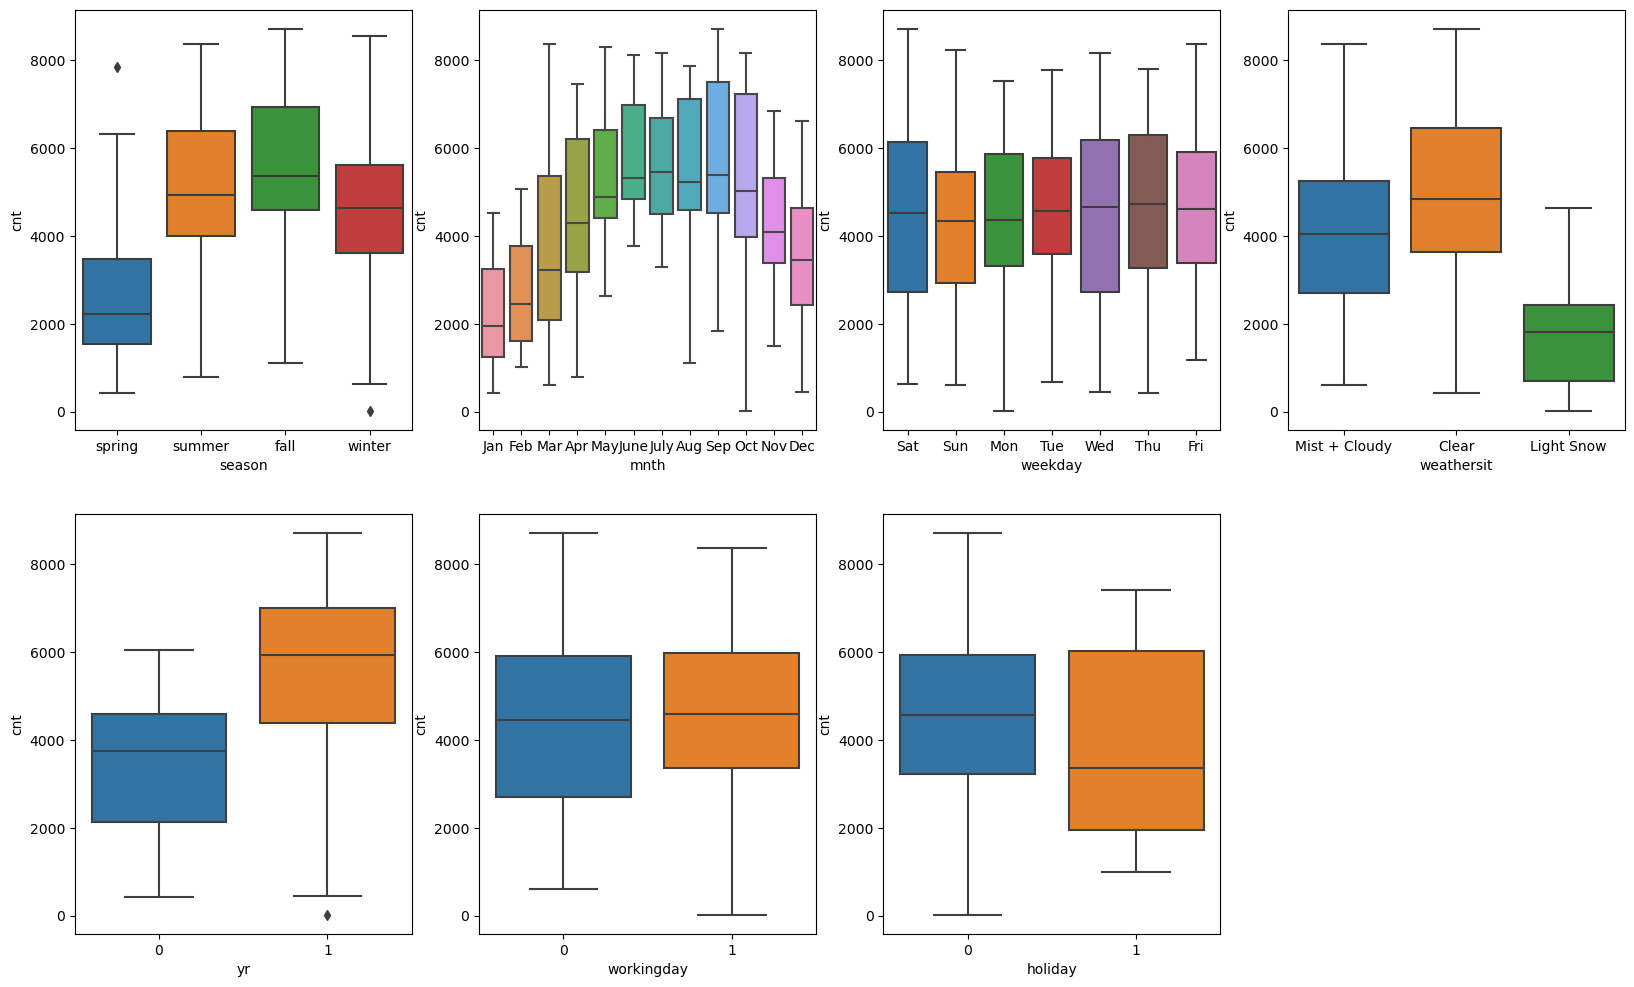

In [136]:
#Performing EDA : Plotting categorical variables before treating them with new metrics for Modelling
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bikeSharing)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=bikeSharing)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=bikeSharing)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=bikeSharing)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=bikeSharing)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bikeSharing)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=bikeSharing)
plt.show()

Inferences:
1. 2019 vehicles have seen higher demand over 2018
2. Higher bike rentals during holidays
3. Higher bike rentals during Clear weather
4. Higher bike rentals during Wednesday, Thursday and Saturday. Thereby no big differnce in bike usage between working day and non working day
5. Higher bike rentals during July, August, September and October
6. Higher bike rentals during Summer and Fall

In [137]:
#Introducing dummy variables for modeling. Each of the categorical variables are segmented into 0s and 1s 
month = pd.get_dummies(bikeSharing.mnth, drop_first=True)
weekday = pd.get_dummies(bikeSharing.weekday, drop_first=True)
weathersit = pd.get_dummies(bikeSharing.weathersit, drop_first=True)
season = pd.get_dummies(bikeSharing.season, drop_first=True)
bikeSharing = pd.concat([bikeSharing,month,weekday,weathersit,season],axis=1)

In [138]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [139]:
#Dropping categorical variables for further cleaning
bikeSharing.drop(['season','mnth','weekday','weathersit'],axis=1, inplace=True)

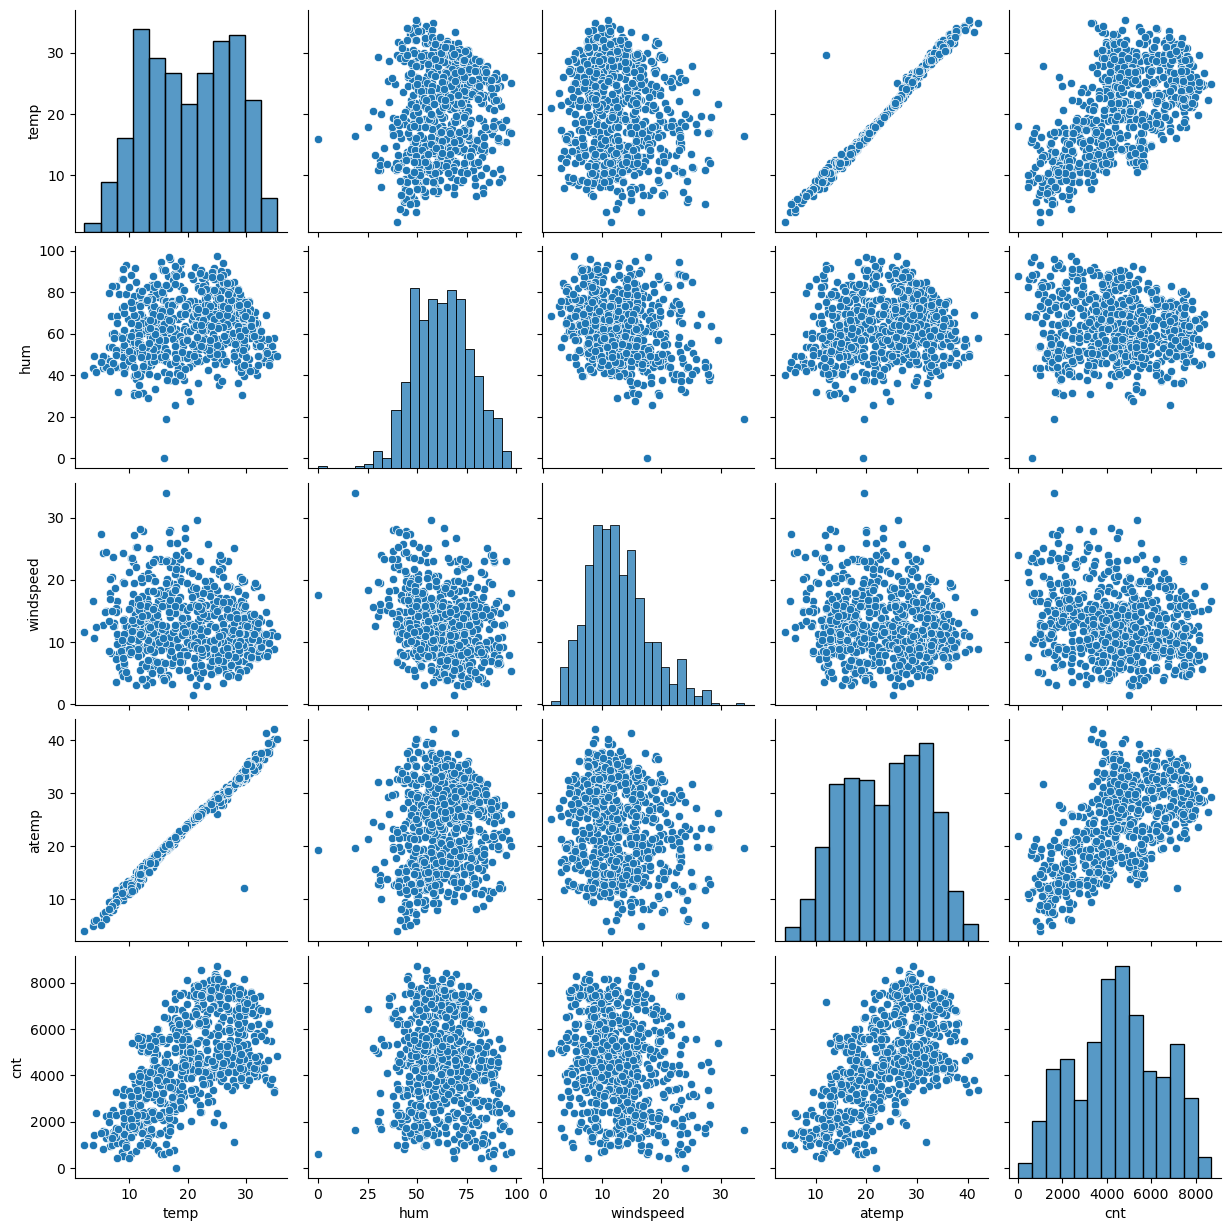

In [140]:
#EDA : Assessing relationship between available numeric variables
sns.pairplot(bikeSharing, vars=["temp", "hum",'windspeed','atemp','cnt'])
plt.show()

Inference:
1. atemp and temp are establish collinearity. one can be replaced by another
2. cnt establishes linear relationship with temp, atemp (based on scatter plots)
3. Lower humidity values doesn't have cnt implying there's a threshold around 25. the case is vice versa with windspeed where there is a cpa beyond 30
4. Similar trend is seen with distribution as well; cnt establishes normal distribution, windspeed - left skewed and humidity - right skewed 

In [141]:
#Assessing correlation to decide removal of atemp. If not adjusted R^2 can also be used later
bikeSharing['temp'].corr(bikeSharing['atemp'])

0.9916961786905648

In [142]:
#Assessing characteristics after introducing new variables and removing atemp
bikeSharing = bikeSharing.drop(['atemp'],axis=1)
bikeSharing.shape

(730, 29)

In [143]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    uint8  
 8   Dec            730 non-null    uint8  
 9   Feb            730 non-null    uint8  
 10  Jan            730 non-null    uint8  
 11  July           730 non-null    uint8  
 12  June           730 non-null    uint8  
 13  Mar            730 non-null    uint8  
 14  May            730 non-null    uint8  
 15  Nov            730 non-null    uint8  
 16  Oct            730 non-null    uint8  
 17  Sep            730 non-null    uint8  
 18  Mon       

Step-2 Model building and evaluation

In [144]:
#Test and train data split
bikeSharing_train, bikeSharing_test = train_test_split(bikeSharing, train_size=0.7, random_state=100)

In [145]:
#Assessing values to decide scale
bikeSharing.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.084932,0.084932,0.076712,...,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.278971,0.278971,0.266317,...,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Inference:
1. The new categorical variables are between 0 and 1
2. Whereas temp, hum, windspeed and cnt are in the ranges of 2-35, 0 - 97, 1.5 - 34, 22 - 8714 
Min max scaler can be used to scale these values to be between 0 and 1

In [146]:
scaler = MinMaxScaler()
scale_vars = ['hum','windspeed','temp','cnt']
bikeSharing_train[scale_vars] = scaler.fit_transform(bikeSharing_train[scale_vars])

In [147]:
bikeSharing_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
y_train = bikeSharing_train.pop('cnt')
X_train = bikeSharing_train

In [149]:
y_train.head(5)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [150]:
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [151]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [152]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 17 May 2023   Prob (F-statistic):           2.46e-61
Time:                        23:20:12   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
#adding variable yr and checking to see if it improves the R-squared
X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [154]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.34e-130
Time:                        23:20:12   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
#building model with all variables
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [156]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.00e-181
Time:                        23:20:12   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     6.88e+15
================================================================

Inference: 85% of variance in cnt is explained by all the variables

C:\Users\skgan\AppData\Local\Temp\ipykernel_26720\1633242945.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


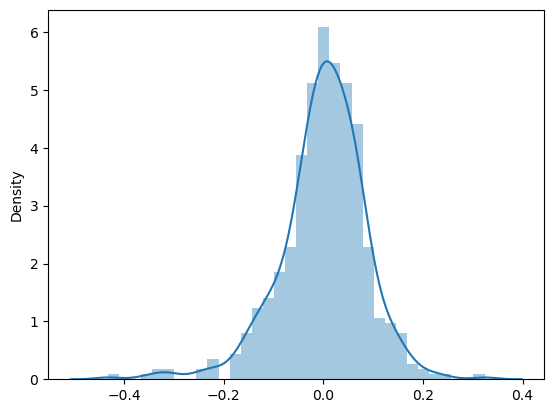

In [157]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.show()

In [158]:
#Using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fit
rfe = rfe.fit(X_train, y_train)

In [159]:
#Assessing selected and rejected elements
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [160]:
#getting the selected feature variables in one variable
true_rfe = X_train.columns[rfe.support_]
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [161]:
#building model using selected RFE variables
X_train_rfe = X_train[true_rfe]

In [162]:
#adding constant
X_train_rfe = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()
lr_model.params


const            0.251893
yr               0.230527
holiday         -0.058173
workingday       0.043335
temp             0.509619
hum             -0.156299
windspeed       -0.186259
Jan             -0.034512
July            -0.052918
Sep              0.081395
Sat              0.053552
Light Snow      -0.247464
Mist + Cloudy   -0.056318
spring          -0.050897
summer           0.050762
winter           0.093301
dtype: float64

In [163]:
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 17 May 2023   Prob (F-statistic):          4.22e-191
Time:                        23:20:12   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
yr                0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
hum              -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July             -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sat               0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
#VIF for the model

#Dropping constant
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Mist + Cloudy,2.29
0,yr,2.09
9,Sat,1.98


In [165]:
X_train_new_1 = X_train_rfe.drop(['workingday'], axis = 1)
X_train_new_2 = X_train_new_1.drop(['Sat'], axis = 1)
X_train_lr2 = sm.add_constant(X_train_new_2)
lr = sm.OLS(y_train, X_train_lr2)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 17 May 2023   Prob (F-statistic):          7.59e-190
Time:                        23:20:13   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2964      0.035      8.483      0.000       0.228       0.365
yr                0.2301      0.008     28.339      0.000       0.214       0.246
holiday          -0.0963      0.026     -3.773      0.000      -0.146      -0.046
temp              0.5124      0.035     14.706      0.000       0.444       0.581
hum              -0.1681      0.038     -4.452      0.000      -0.242      -0.094
windspeed        -0.1874      0.026     -7.253      0.000      -0.238      -0.137
Jan              -0.0333      0.018     -1.892      0.059      -0.068       0.001
July             -0.0556      0.018     -3.039      0.003      -0.092      -0.020
Sep               0.0827      0.017      4.951      0.000       0.050       0.116
Light Snow       -0.2392      0.026     -9.084      0.000      -0.291      -0.187
Mist + Cloudy    -0.0526      0.010     -5.025      0.000      -0.073      -0.032
spring           -0.0519      0.021     -2.476      0.014      -0.093      -0.011
summer            0.0502      0.015      3.336      0.001       0.021       0.080
winter            0.0919      0.018      5.247      0.000       0.057       0.126
==============================================================================
Omnibus:                       58.633   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.919
Skew:                          -0.626   Prob(JB):                     2.26e-29
Kurtosis:                       5.154   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,29.02
2,temp,16.71
4,windspeed,4.66
10,spring,4.34
12,winter,3.36
11,summer,2.79
9,Mist + Cloudy,2.29
0,yr,2.09
5,Jan,1.67
6,July,1.59


In [167]:
X_train_new_3 = X_train_lr2.drop(['hum'], axis = 1)

In [168]:
X_train_lr3 = sm.add_constant(X_train_new_3)
lr = sm.OLS(y_train, X_train_lr3)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 17 May 2023   Prob (F-statistic):          8.14e-187
Time:                        23:20:13   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088      0.000       0.156       0.275
yr                0.2343      0.008     28.517      0.000       0.218       0.250
holiday          -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp              0.4721      0.034     13.772      0.000       0.405       0.539
windspeed        -0.1549      0.025     -6.135      0.000      -0.205      -0.105
Jan              -0.0383      0.018     -2.138      0.033      -0.073      -0.003
July             -0.0503      0.019     -2.706      0.007      -0.087      -0.014
Sep               0.0764      0.017      4.506      0.000       0.043       0.110
Light Snow       -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Mist + Cloudy    -0.0793      0.009     -9.067      0.000      -0.096      -0.062
spring           -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer            0.0434      0.015      2.845      0.005       0.013       0.073
winter            0.0757      0.017      4.335      0.000       0.041       0.110
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,yr,2.07
11,winter,1.78
4,Jan,1.61
5,July,1.59
8,Mist + Cloudy,1.56
6,Sep,1.34


In [170]:
X_train_new_4 = X_train_lr3.drop(['windspeed'], axis = 1)
X_train_lr4 = sm.add_constant(X_train_new_4)
lr = sm.OLS(y_train, X_train_lr4)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.83e-180
Time:                        23:20:13   Log-Likelihood:                 482.52
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1586      0.030      5.289      0.000       0.100       0.218
yr                0.2330      0.009     27.382      0.000       0.216       0.250
holiday          -0.0999      0.027     -3.710      0.000      -0.153      -0.047
temp              0.4914      0.035     13.894      0.000       0.422       0.561
Jan              -0.0240      0.018     -1.307      0.192      -0.060       0.012
July             -0.0513      0.019     -2.659      0.008      -0.089      -0.013
Sep               0.0810      0.018      4.617      0.000       0.047       0.116
Light Snow       -0.3002      0.025    -11.804      0.000      -0.350      -0.250
Mist + Cloudy    -0.0778      0.009     -8.596      0.000      -0.096      -0.060
spring           -0.0734      0.022     -3.351      0.001      -0.116      -0.030
summer            0.0344      0.016      2.188      0.029       0.004       0.065
winter            0.0791      0.018      4.376      0.000       0.044       0.115
==============================================================================
Omnibus:                       68.324   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.088
Skew:                          -0.692   Prob(JB):                     3.16e-37
Kurtosis:                       5.449   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.28
0,yr,2.07
8,spring,1.99
9,summer,1.94
3,Jan,1.60
4,July,1.59
10,winter,1.57
7,Mist + Cloudy,1.56
5,Sep,1.34
6,Light Snow,1.07


In [172]:
X_train_new_5 = X_train_lr4.drop(['July'], axis = 1)
X_train_lr5 = sm.add_constant(X_train_new_5)
lr = sm.OLS(y_train, X_train_lr5)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.3
Date:                Wed, 17 May 2023   Prob (F-statistic):          8.12e-180
Time:                        23:20:13   Log-Likelihood:                 478.92
No. Observations:                 510   AIC:                            -935.8
Df Residuals:                     499   BIC:                            -889.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1509      0.030      5.024      0.000       0.092       0.210
yr                0.2336      0.009     27.295      0.000       0.217       0.250
holiday          -0.0987      0.027     -3.645      0.000      -0.152      -0.046
temp              0.4774      0.035     13.568      0.000       0.408       0.547
Jan              -0.0261      0.018     -1.412      0.159      -0.062       0.010
Sep               0.0949      0.017      5.633      0.000       0.062       0.128
Light Snow       -0.3011      0.026    -11.770      0.000      -0.351      -0.251
Mist + Cloudy    -0.0764      0.009     -8.400      0.000      -0.094      -0.059
spring           -0.0616      0.022     -2.854      0.005      -0.104      -0.019
summer            0.0495      0.015      3.357      0.001       0.021       0.079
winter            0.0913      0.018      5.190      0.000       0.057       0.126
==============================================================================
Omnibus:                       70.127   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.705
Skew:                          -0.717   Prob(JB):                     2.32e-37
Kurtosis:                       5.426   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.92
0,yr,2.07
7,spring,1.89
8,summer,1.63
3,Jan,1.60
6,Mist + Cloudy,1.56
9,winter,1.43
4,Sep,1.23
5,Light Snow,1.07
1,holiday,1.04


In [174]:
#Residual analysis
X_train_lr5 = sm.add_constant(X_train_lr5)
X_train_lr5

,const,yr,holiday,temp,Jan,Sep,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1,0,0.815169,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,0,0,1,1,0,0
728,1.0,1,0,0.245101,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0,0,0,1,0,1,0
111,1.0,0,0,0.345824,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0,0,0,1,0,0,1
79,1.0,0,0,0.462664,0,0,0,1,0,1,0


C:\Users\skgan\AppData\Local\Temp\ipykernel_26720\151229855.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


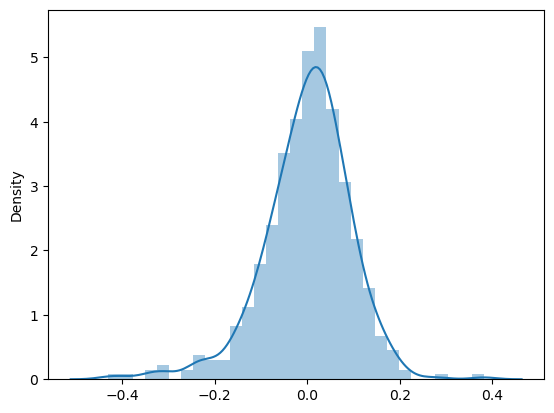

In [175]:
#Residual analysis for RFE 
y_train_pred = lr_model.predict(X_train_lr5)
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.show()

Regression Equation
1. using iterative method: 0.2431 + 0.2324*year + 0.010*holiday + 0.4454*temp - 0.1515*hum -0.1860*windspeed + 0.0204*Aug - 0.0443*Dec - 0.032*Feh - 0.063*Jan - 0.033*July + 0.004*June + 0.0013*Mar + 0.023* May - 0.0399*Nov + 0.0075*Oct + 0.0859*Sept + 0.041*sun - 0.0091*Thu - 0.018*Tue - 0.0055*Wed - 0.2558*Light snow - 0.0596*Mist - 0.0448*spring + 0.030*summer + 0.108*winter
2. Using RFE : 0.1509 + 0.2336	* year  -0.0987 * holiday +	0.4774 * temp -0.0261* Jan + 0.0949*Sep - 0.3011 * Light Snot - 0.0764* Mist - 0.0616 * spring + 0.0495* summer + 0.0913*winter


In [178]:

y_test = bikeSharing_test.pop('cnt')
X_test = bikeSharing_test

In [179]:
X_train_lr5.drop(columns= 'const', inplace = True)
X_test_new = X_test[X_train_lr5.columns]
X_test_new = sm.add_constant(X_test_new)


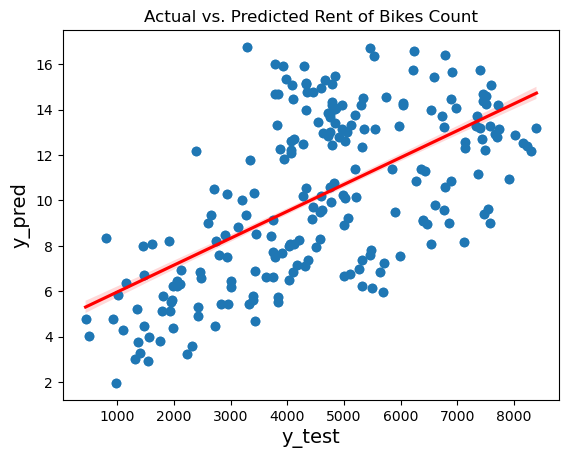

In [184]:
y_pred = lr_model.predict(X_test_new)
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)              
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.show()

Inference
1. Temperature affects the Business positively,
2. Raining, Humidity, Windspeed and Cloudy affects the Business negatively.
3. The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.
4. Saturday rentals are more than other usual Days
5. High demand in 2019 than 2018
